## Training Gaussian boson sampling distributions (arXiv:2004.04770v1)

In [1]:
#!pip install thewalrus


In [2]:
import thewalrus as tw
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import networkx as nx
import time


In [1]:
def ising(x):
    
    H = 0
    J = 1
    h = 1
    for i in range(len(x)):
        H += -h * int(x[i]) 
    for j in range(len(x) - 1):
        H += - J * int(x[j]) * int(x[j + 1])

    return H


def probability(samples):  
    
    p = np.zeros([maximum + 1])
    for sample in samples:
        n = 0
        t = 0
        for i in sample[-1::-1]:
            n += i * 2**t
            t += 1
        p[n] += 1
        
    return p / n_samples
        

def cost(theta, F, A, measuments, n_samples):
    
    
    W = np.diag([np.exp(-theta @ F[i]) for i in range(len(theta))]) # parametrization A(theta)
    A_theta = W @ A @ W 
     
    
    #samples form torontonian using thewalrus library
    samples = tw.samples.torontonian_sample_graph(A_theta, n_mean=5, samples=n_samples, cutoff=10, max_photons=30, parallel=False)

    
    p = probability(samples)
    
    
    C = 0 #cost
    for i in range(len(measuments)):
        C += ising(measuments[i]) * p[i]

        
    return C


205.5095477104187

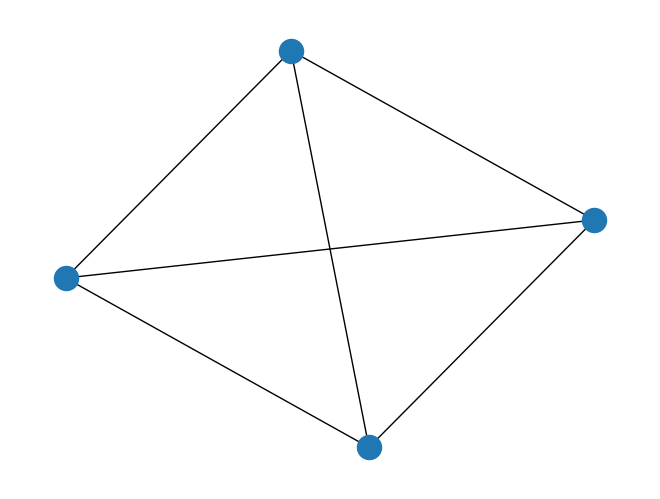

In [4]:
t_start = time.time()


modes = 4  #number of modes
n_samples = 10 # number of samples


nodes = modes  
A = nx.random_regular_graph(3,nodes)
nx.draw(A)
A = nx.to_numpy_array(A)


maximum = 0  # number of all possible outcomes
for j in range(modes):
    maximum += 2**j
measuments = [bin(i)[2:] for i in range(maximum + 1)] #all possible outcomes
    

F = np.array(np.random.uniform(0, 1, size=(modes, modes)))  # parametrization A(theta)
theta = np.array(np.random.uniform(0, 1, size=modes))


bnds = ((0, 1), ) * modes
res = minimize(cost, theta, args=(F, A, measuments, n_samples), method='L-BFGS-B', bounds=bnds, options={'gtol': 1e-10, 'maxiter': 10})


t_end = time.time()
float(t_end - t_start)


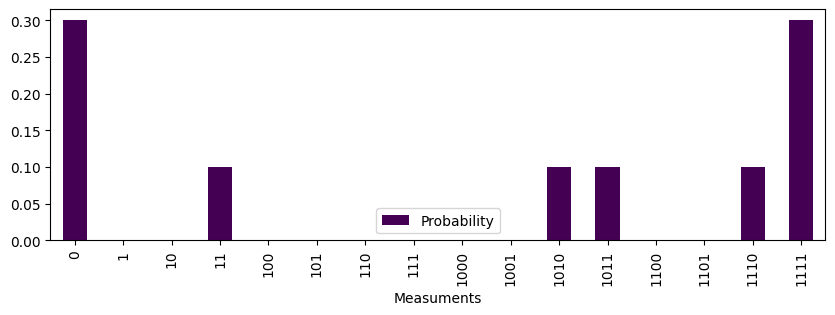

In [5]:
W = np.diag([np.exp(res.x @ F[i]) for i in range(len(theta))]) # parametrization A(theta)
A_theta = W @ A @ W 
samples = tw.samples.torontonian_sample_graph(A_theta, n_mean=5, samples=n_samples, cutoff=10, max_photons=30, parallel=False)

probability = probability(samples)

pr_dict = {'Measuments' : measuments,
              'Probability' : probability}
data = pd.DataFrame(pr_dict)

data.plot(kind='bar', x='Measuments', colormap = 'viridis', figsize=(10, 3));
